<div style="width: 100%; clear: both;">
<div style="float: left; width: 50%;">
<img src="http://www.uoc.edu/portal/_resources/common/imatges/marca_UOC/UOC_Masterbrand.jpg", align="left">
</div>
</div>
<div style="float: right; width: 50%;">
<p style="margin: 0; padding-top: 22px; text-align:right;">M2.877 · Análisis de sentimientos y textos</p>
<p style="margin: 0; text-align:right;">Máster Universitario de Ciencia de Datos(Data science)</p>
<p style="margin: 0; text-align:right; padding-button: 100px;">Estudios de Informática, Multimedia y Telecomunicaciones</p>
</div>
</div>
<div style="width: 100%; clear: both;">
<div style="width:100%;">&nbsp;</div>

# PRA 3: Deep Learning para el análisis de textos 

En esta práctica revisaremos y aplicaremos los conocimientos aprendidos durante el curso y, en más detalle, en los últimos módulos del mismo. En concreto trataremos los siguientes temas:

1. **Traducción automatica**: con custom embeddings y con embeddings preentrenados.
2. **Classificación de frases**: Aplicación de los conceptos ya trabajados para la reutilización de la arquitectura de dos modelos.

3. **Detección de NER y NEL**: detección y clasificación de entidades nombradas (NER) y entity linking basandonos en los temas ya trabajados en los notebooks de NER y NEL y añadiendo un ejemplo sencillo de transformers. 

También incluimos algunos otros temas transversales trabajados a lo largo de la asignatura.


# PARTE 1

En esta primera parte de la práctica se pide resolver los ejercicios usando la libreria **KERAS**.

# 1. Traducción Automática (4 puntos)




## 1.1 TA con Custom Embeddings (2 puntos)


El objetivo de este apartado es entrenar un modelo de traducción automática entre inglés y holandes, siguento los mismos pasos que en el notebook de Machine Translation. 


<strong>Implementación:</strong> Siguiendo los pasos trabajados en el notebook de traducción automática, implementar y entrenar un modelo de traducción automática, del inglés al holandés.  <br>
    - La capa embedding debe de tener una dimensión igual a 300 <br>
    - Se recomienda una longitud màxima de secuencia de 12 <br>
 <br>
    
Mostrad la aplicación del modelo entrenado con algún ejemplo.

In [4]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
!pip3 install numpy
#==1.19.5

Primero deberéis cargar los datos proporcionados, que encontraréis en el fichero mt/nld.txt 

In [1]:
#############################################
# SOLUCIÓN                                  #
#############################################
from numpy import array

def read_text(filename):
        file = open(filename, mode='rt', encoding='utf-8')
        # read all text
        text = file.read()
        file.close()
        return text

# Convertir el texto a pares de oraciones inglés-alemán
def to_lines(text):
    sents = text.strip().split('\n')
    #En cada línea, tomar los dos primeros elementos separados por un tabulador. El primer elemento es la frase
    #en inglés y el segundo elemento es su equivalente al alemán
    sents = [i.split('\t')[:2] for i in sents]
    return sents    

# El fichero deu.txt contiene el dataset
file_path = "/kaggle/input/nlddata/nld.txt"

data = read_text(file_path)
data_dutch_english = to_lines(data)
data_dutch_english = array(data_dutch_english)

In [2]:
data_dutch_english[1]

array(['Go.', 'Vooruit.'], dtype='<U286')

Preprocesar los datos, para eliminar puntuaciones y poner en minúscula

In [3]:
#############################################
# SOLUCIÓN                                  #
#############################################
import string

# Eliminar signos de puntuación
data_dutch_english[:,0] = [s.translate(str.maketrans('', '', string.punctuation)) for s in data_dutch_english[:,0]]
data_dutch_english[:,1] = [s.translate(str.maketrans('', '', string.punctuation)) for s in data_dutch_english[:,1]]

# Convertir a minúsculas
data_dutch_english[:,0] = [s.lower() for s in data_dutch_english[:,0]]
data_dutch_english[:,1] = [s.lower() for s in data_dutch_english[:,1]]

Visualizar los datos resultantes, para tener una idea de como van a ser los datos con los que vamos a trabajar, en concreto ver el tamaño del corpus tanto los vectores del inglés como las del holandes.

In [4]:
#############################################
# SOLUCIÓN                                  #
#############################################
data_dutch_english[1:5]

array([['go', 'vooruit'],
       ['hi', 'hoi'],
       ['hi', 'hé'],
       ['hi', 'hai']], dtype='<U286')

In [5]:
len(data_dutch_english)

73576

In [14]:
#!pip install --upgrade keras
#!pip install tensorflow

Calcular el vocabulario tanto en holandés como en inglés, e imprimir su tamaño. 

In [6]:
#############################################
# SOLUCIÓN                                  #
#############################################

from keras.preprocessing.text import Tokenizer

def tokenization(sentences):
    tokenizer = Tokenizer()
    tokenizer.fit_on_texts(sentences)
    return tokenizer

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

In [7]:
#Tokenizar las frases en inglés
english_tokenizer = tokenization(data_dutch_english[:, 0])
dutch_tokenizer = tokenization(data_dutch_english[:, 1])

# Imprimimos algunos datos del vocabulario en holandes
print(list(dutch_tokenizer.word_index.items())[:10])

[('ik', 1), ('tom', 2), ('is', 3), ('het', 4), ('je', 5), ('de', 6), ('dat', 7), ('een', 8), ('niet', 9), ('zijn', 10)]


In [8]:
# Imprimos la longitud el corpus de los dos vocabularios
english_corpus_size = len(english_tokenizer.word_index) +1
dutch_corpus_size = len(dutch_tokenizer.word_index) +1
print(f"Longitud del Corpus en inglés: {english_corpus_size}")
print()
print(f"Longitud del Corpus en holnadés: {dutch_corpus_size}")

Longitud del Corpus en inglés: 10101

Longitud del Corpus en holnadés: 14586


Separamos los conjuntos de entrenamiento por idioma y los codificamos. 

In [9]:
#############################################
# SOLUCIÓN                                  #
#############################################
from sklearn.model_selection import train_test_split

# Generamos el conjunto de trairn y test 
train, test = train_test_split(data_dutch_english, test_size=0.2, random_state = 12)

In [10]:
from keras.utils import pad_sequences

def encode_sequences(tokenizer, length, lines):
    # Codificar las secuencias con los índices de las palabras
    seq = tokenizer.texts_to_sequences(lines)
    # Hacer el padding
    seq = pad_sequences(seq, maxlen=length, padding='post')
    return seq

In [13]:
data_dutch_english[:, 0]

array(['go', 'go', 'hi', ...,
       'if you translate from your second language into your own native language rather than the other way around youre less likely to make mistakes',
       'the tatoeba project which can be found online at tatoebaorg is working on creating a large database of example sentences translated into many languages',
       'if someone who doesnt know your background says that you sound like a native speaker it means they probably noticed something about your speaking that made them realize you werent a native speaker in other words you dont really sound like a native speaker'],
      dtype='<U286')

In [15]:
# Calculamos la longitud máxima de las oraciones

#english_max_length = max([len(text) for text in data_dutch_english[:, 0]])
#dutch_max_length = max([len(text) for text in data_dutch_english[:, 1]])  
english_max_length = 12
dutch_max_length = 12
print("english_max_length", english_max_length)
print("dutch_max_length", dutch_max_length)


english_max_length 12
dutch_max_length 12


In [34]:
# Codificamos el conjunto de train
trainY = encode_sequences(english_tokenizer, english_max_length, train[:, 0])
trainX = encode_sequences(dutch_tokenizer, dutch_max_length, train[:, 1])

# Imprimimos algunos datos en holandés
trainX[:5]

array([[   2,    3,   71,  608,   12, 2149,    0,    0,    0,    0,    0,
           0],
       [ 383,   37,    7,    1,  121,   43,   58,    0,    0,    0,    0,
           0],
       [  18,   36,   34,   93,   29,   11, 3047,    0,    0,    0,    0,
           0],
       [  18,   72,    8,   66, 1716,  286,    0,    0,    0,    0,    0,
           0],
       [  17,  637,    3,  702,    0,    0,    0,    0,    0,    0,    0,
           0]], dtype=int32)

In [35]:
#############################################
# SOLUCIÓN                                  #
#############################################
testY = encode_sequences(english_tokenizer, english_max_length, test[:, 0])
testX = encode_sequences(dutch_tokenizer, dutch_max_length, test[:, 1])

Definimos el modelo encoder-decoder basandonos en el notebook visto en la asignatura, e instanciamos el modelo con una capa de embedding para las frases de la lengua origen (inglés) y la dimensión de la última capa como el vocabulario de la lengua destino (holandés)

In [36]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Embedding, RepeatVector

def define_model(in_vocab_size, embedding_vec_length, max_text_length, out_timesteps, out_vocab_size):
    model = Sequential()
    # Embedding
    model.add(Embedding(in_vocab_size, embedding_vec_length, input_length = max_text_length, mask_zero=True))
    
    # Decoder
    model.add(LSTM(units))
    
    # Encoder
    model.add(RepeatVector(out_timesteps))
    model.add(LSTM(units, return_sequences=True))
   
    # Output
    model.add(Dense(out_vocab_size, activation='softmax'))
    return model

units = 200

#La longitud de los vectores corresponde al número de units del LSTM
embedding_vec_length = units

model = define_model(dutch_corpus_size, embedding_vec_length, dutch_max_length, english_max_length, english_corpus_size)

Compilamos el modelo

In [38]:
#############################################
# SOLUCIÓN                                  #
#############################################
from keras import optimizers

rms = optimizers.RMSprop(learning_rate=0.001)
model.compile(optimizer=rms, loss='sparse_categorical_crossentropy')

Entrenamos y guardamos el modelo. 
El modelo puede tardar horas si se hace en CPU, mucho menos si se puede realizar en GPU. Colab permite el uso de GPU en general, si no se hace un uso extensivo, y se va deshabilitando la opción y habilitando segun necesidades. Si se tiene activada siempre penaliza y la desactiva. Para probar si funciona, recomendamos probar de lanzar el entrenamiento solo con una época y ver que funciona, y una vez tenemos claro que el flujo esta funcionando, ya lanzar con muchas más. 

Hemos visto que en Colab, a pesar de que pedimos que el tamaño de sentencia máxima sea 12, no puede cargar el modelo en memoria y recomendamos bajarlo a 4 y el número de "units" a 200, de esta manera si que es capaz de trabajar.

In [39]:
#############################################
# SOLUCIÓN                                  #
#############################################

from keras.callbacks import ModelCheckpoint

filename = 'model.h5'

#La función ModelCheckpoint() guarda el modelo con la pérdida de validación más baja.

checkpoint = ModelCheckpoint(filename, monitor='val_loss', verbose=1, save_best_only=True, mode='min')

#Entrenamiento del modelo. Se realiza con 30 epoch con un tamaño de batch de 512, con un reparto de validación del
#20%; esto es, 80% se destina al entrenamiento en sí, y el 20% restante a su validación.

model.fit(trainX, trainY.reshape(trainY.shape[0], trainY.shape[1], 1),
                    epochs=30, batch_size=512, validation_split = 0.2,callbacks=[checkpoint], 
                    verbose=1)
model.save('model_all.h5')

Epoch 1/30
92/92 [==============================] - ETA: 0s - loss: 3.8596
Epoch 1: val_loss improved from inf to 3.31640, saving model to model.h5
92/92 [==============================] - 13s 75ms/step - loss: 3.8596 - val_loss: 3.3164
Epoch 2/30
92/92 [==============================] - ETA: 0s - loss: 3.1642
Epoch 2: val_loss improved from 3.31640 to 3.11524, saving model to model.h5
92/92 [==============================] - 5s 58ms/step - loss: 3.1642 - val_loss: 3.1152
Epoch 3/30
91/92 [============================>.] - ETA: 0s - loss: 3.0122
Epoch 3: val_loss improved from 3.11524 to 3.05907, saving model to model.h5
92/92 [==============================] - 5s 59ms/step - loss: 3.0123 - val_loss: 3.0591
Epoch 4/30
91/92 [============================>.] - ETA: 0s - loss: 2.9447
Epoch 4: val_loss improved from 3.05907 to 3.00838, saving model to model.h5
92/92 [==============================] - 5s 59ms/step - loss: 2.9432 - val_loss: 3.0084
Epoch 5/30
92/92 [=========================

Una vez entrenado el modelo, se aplica con el conjunto de test para obtener unas prediciones. 

Visualizamos los resultados de las predicciones con los valores esperados. Los resultados son curiosos, no podríamos usar este modelo para un entorno real como vais a poder ver. 

Pregunta: ¿Porque creéis que no son buenos, y como creéis que podrían obtenerse mejores resultados?

Como se puede observar, he tenido que reducir el conjunto de datos de test para poder realizar la predicción y que no fallara por memoria.

In [49]:
testX_shorten = testX[0:1000]
testX_shorten.shape[0]

1000

In [50]:
#############################################
# SOLUCIÓ                                  #
#############################################
from keras.models import load_model
import numpy as np

preds = np.argmax(model.predict(testY_shorten.reshape((testY_shorten.shape[0],testY_shorten.shape[1]))), axis=-1)

32/32 [==============================] - 0s 5ms/step


In [51]:
def get_word(n, tokenizer):
    for word, index in tokenizer.word_index.items():
        if index == n:
            return word
    return None

preds_text = []

for i in preds:
    temp = []
    for j in range(len(i)):
        #Obtener la palabra que corresponde al índice del vocabulario de la lengua destino
        t = get_word(i[j], dutch_tokenizer)
        if j > 0:
            if (t == get_word(i[j-1], dutch_tokenizer)) or (t == None):
                     temp.append('')
            else:
                     temp.append(t)
        else:
            if(t == None):
                temp.append('')
            else:
                temp.append(t) 

    preds_text.append(' '.join(temp))

In [53]:
import pandas as pd
test_shorten = test[0:1000] 
pred_df = pd.DataFrame({'actual' : test_shorten[:,0], 'predicted' : preds_text})

pred_df.sample(15)

,actual,predicted
273,how much will it cost,het we
459,i forgot to bring my umbrella with me,ik wel je mijn hebben je hij
205,i wonder if hell come tonight,ik van in je ze
570,experts say coffee prices are rising mainly be...,is praten van zijn
913,im afraid to touch anything,was het op
774,had they known what was about to happen they w...,jullie doe het je is
388,do you want to come along,wat op
156,tom doesnt like to ask for help,tom nieuwsgierig je tom om
116,im always busy,was heb
772,he boasted of his courage,heb over kan je


Vemos que el error es muy alto y que los resultados no son buenos, esto se puede deber a que hemos escogido una longitud máxima de secuencia de 12, lo que puede provocar que se pierda información relevante al truncar las secuencias. De esta forma el modelo tiene dificultades para aprender patrones y realizar traducciones exactas. 

Además, el tamaño del conjunto de datos también influye pues podría estar produciéndose sobreentrenamiento.

Por tanto, podríamos probar aumentando la longitud máxima de secuencia o modificando la dimesión de la capa de embedding, que determina la representación vectorial de las palabras en el modelo.

MOTIVO

## 1.2 TA con Embeddings preentrenados (2 puntos)

En este apartado repetiremos el ejercicio anterior cargando a la capa de embedding los pesos d'un modelo GloVe entrenado para el inglés. 

Empezamos cargando el modelo GloVe para el inglés. Podéis usar 'glove.42B.300d.txt'. Se puede bajar de aquí: https://nlp.stanford.edu/projects/glove/

In [54]:
import numpy as np

embeddings_index = {}

file_path = "/kaggle/input/aida-image-captioning-preprocessing-glove/glove.42B.300d.txt"
f = open(file_path)
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print(len(embeddings_index))

1917494


A continuación, tenemos que construir la matriz de embeddings. 
Para no cargar todo el vocabulario del modelo, podemos filtrar solo aquellas entradas presentes en el vocabulario del tokenizador que usaremos. Además, tenemos de incluir en la matriz de vectores correspondientes los índices de las entradas (palabras) que no encontremos en el modelo glove cargado. Estos vectores se suelen inicializar con 0s o con el resultado de una distribución N(0,1)

Por ejemplo, si nuestro tokenizador se llamara `eng_tokenizer` podríamos hacer:

In [14]:
#print(list(embeddings_index.items())[1])
#english_tokenizer

### Tokenizar las frases en inglés
eng_tokenizer = tokenization(embeddings_index[:, 0])

In [56]:
# Usamos el english_tokenizer creado anteriormente
embedding_matrix = np.zeros((len(english_tokenizer.word_index) + 1, 300))
for word, i in english_tokenizer.word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector


Para inicializar una capa de embeddings con pesos predefinidos se utiliza el argumento `weights`. Además, como no queremos que se modifiquen los pesos, marcamos el argumento `trainable` como `False`. 

Siguiendo con nuestro ejemplo, haríamos:

In [57]:
from keras.layers import Embedding
embedding_vec_length = 300
max_text_length = 12
embedding_layer = Embedding(len(english_tokenizer.word_index) + 1,
                            embedding_vec_length,
                            weights=[embedding_matrix],
                            input_length=max_text_length,
                            trainable=False,
                            mask_zero=True)


Implementa y entrena de nuevo un modelo de traducción automática del inglés al holandés de forma similar, esta vez cargando los pesos de la capa embedding a partir del modelo Glove preentrenado en inglés y disponible en 'glove.42B.300d.txt'.


In [58]:
#############################################
# SOLUCIÓN                                  #
#############################################
from keras.models import Sequential
from keras.layers import Dense, LSTM, Embedding, RepeatVector

def define_glove_model(embedding_layer,units, out_timesteps, out_vocab_size):
    model = Sequential()
    # Embedding
    model.add(embedding_layer)
    
    # Decoder
    model.add(LSTM(units))
    
    # Encoder
    model.add(RepeatVector(out_timesteps))
    model.add(LSTM(units, return_sequences=True))
   
    # Output
    model.add(Dense(out_vocab_size, activation='softmax'))
    return model

units = 300

model_glove = define_glove_model(embedding_layer, units, max_text_length, english_corpus_size)

In [59]:
from keras import optimizers

rms = optimizers.RMSprop(learning_rate=0.001)
model_glove.compile(optimizer=rms, loss='sparse_categorical_crossentropy')

Entrenamos y guardamos el modelo. Otra vez, aunque este entrenamiento es quizá un "poco" más liviano que el anterior, recomendamos el uso de GPU si es viable.

In [60]:
#############################################
# SOLUCIÓN                                  #
#############################################
from keras.callbacks import ModelCheckpoint

filename = 'model_glove.h5'

#La función ModelCheckpoint() guarda el modelo con la pérdida de validación más baja.

checkpoint = ModelCheckpoint(filename, monitor='val_loss', verbose=1, save_best_only=True, mode='min')

#Entrenamiento del modelo. Se realiza con 30 epoch con un tamaño de batch de 512, con un reparto de validación del
#20%; esto es, 80% se destina al entrenamiento en sí, y el 20% restante a su validación.

model_glove.fit(trainX, trainY.reshape(trainY.shape[0], trainY.shape[1], 1),
                    epochs=30, batch_size=512, validation_split = 0.2,callbacks=[checkpoint], 
                    verbose=1)
model_glove.save('model_glove_all.h5')

Epoch 1/30
92/92 [==============================] - ETA: 0s - loss: 3.5633
Epoch 1: val_loss improved from inf to 3.16048, saving model to model_glove.h5
92/92 [==============================] - 14s 93ms/step - loss: 3.5633 - val_loss: 3.1605
Epoch 2/30
92/92 [==============================] - ETA: 0s - loss: 3.0700
Epoch 2: val_loss improved from 3.16048 to 3.01794, saving model to model_glove.h5
92/92 [==============================] - 8s 85ms/step - loss: 3.0700 - val_loss: 3.0179
Epoch 3/30
92/92 [==============================] - ETA: 0s - loss: 2.9459
Epoch 3: val_loss improved from 3.01794 to 2.86224, saving model to model_glove.h5
92/92 [==============================] - 7s 77ms/step - loss: 2.9459 - val_loss: 2.8622
Epoch 4/30
92/92 [==============================] - ETA: 0s - loss: 2.7920
Epoch 4: val_loss improved from 2.86224 to 2.81637, saving model to model_glove.h5
92/92 [==============================] - 7s 77ms/step - loss: 2.7920 - val_loss: 2.8164
Epoch 5/30
92/92 [=

Aplicar el modelo y visualizar los resultados a partir de las prediciones obtenidas con este nuevo modelo.

In [61]:
#############################################
# SOLUCIÓN                                  #
#############################################

from keras.models import load_model
import numpy as np
#model = load_model('/kaggle/input/model-h5/model.h5')
textX_shorten = testX[0:1000]
preds_glove = np.argmax(model_glove.predict(textX_shorten.reshape((textX_shorten.shape[0],textX_shorten.shape[1]))), axis=-1)

32/32 [==============================] - 2s 5ms/step


<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>(Opcional) Análisis:</strong> Explica cuales són las principales diferencias entre los dos modelos entrenados. ¿Como podríamos mejorar los resultados de esta tarea en concreto?
</div>

La principal diferencia entre usar un modelo de traducción con un embedding personalizado y utilizar embeddings preentrenados como GloVe está en la **forma en la que se generan y aplican los vectores**.

Cuando se emplea un **embedding personalizado**, los vectores de palabras se generan específicamente para el conjunto de datos o el dominio en el que se aplicará el modelo. Es decir, los vectores se entrenan desde cero junto con el modelo de traducción, de forma que el modelo aprende a asignar representaciones vectoriales a cada palabra en función de la tarea de traducción específica que se está realizando. Como hemos visto en el apartado anterior, esto puede requerir muchos recursos y tiempo, además de un conjunto de datos de entrenamiento grande para obtener resultados óptimos.

Por su parte, los **embeddings preentrenados como GloVe** son vectores de palabras generados previamente en grandes conjuntos de datos, como Wikipedia o noticias en varios idiomas. Por tanto, estos vectores de palabras capturan información semántica y contextual de las palabras en diferentes contextos. Los embeddings preentrenados se pueden utilizar como una forma de transferencia de aprendizaja (transfer learning), donde se aprovecha el conocimiento previo sobre las palabras para ayudar a mejorar el rendimiento de modelos de traducción, por ejemplo. 

Por ello, usar un embedding como GloVe aporta la ventaja de que el modelo ya posee conocimiento lingüístico, optimizando la traducción y necesitando menos recursos y datos. Además, al estar entrenados con grandes conjunto, suelen ser poco propensos a generar overfitting.


Sin embargo, es importante tener en cuenta que los embeddings preentrenados pueden no capturar adecuadamente las particularidades del dominio o el conjunto de datos específico en el que se está trabajando. En tales casos, los embeddings personalizados pueden resultar más efectivos, ya que se ajustan directamente a la tarea de traducción específica.

Una forma de mejorar los resultados sería usar fine tuning para ajustar el modelo a nuestro conjunto de datos, o combinarlo con otras arquitecturas como CNN o RNN.

https://towardsdatascience.com/pre-trained-word-embeddings-or-embedding-layer-a-dilemma-8406959fd76c

In [62]:
preds_glove_text = []

for i in preds_glove:
    temp = []
    for j in range(len(i)):
        #Obtener la palabra que corresponde al índice del vocabulario de la lengua destino
        t = get_word(i[j], dutch_tokenizer)
        if j > 0:
            if (t == get_word(i[j-1], dutch_tokenizer)) or (t == None):
                     temp.append('')
            else:
                     temp.append(t)
        else:
            if(t == None):
                temp.append('')
            else:
                temp.append(t) 

    preds_glove_text.append(' '.join(temp))

In [63]:
preds_glove_text[1]

'jij het geen je ge       '

In [64]:
import pandas as pd
test_shorten = test[0:1000] 
pred_df = pd.DataFrame({'actual' : test_shorten[:,0], 'predicted' : preds_glove_text})

pred_df.sample(15)

,actual,predicted
942,whats in the top drawer,zij zijn is lopend
725,i will hit the sack,ben gaan je
282,spain is a european country,slaat dat de boeken
538,tom took more than one picture didnt he,tom plotseling vandaag of te
387,wait till i count to ten,ik moeilijk verloren
202,what time is sunrise,er veel mij heb waar bent
610,if you buy me an ice cream ill give you a kiss,hebt het weer we
785,tom respects mary,tom dat om
685,tom told me he liked working with mary,tom alles we te om
745,she has a house by the sea,weet moet de iemand


# PARTE 2


# 2. Classificación de notícias (4 puntos)

---



En este apartado planteamos el uso de las arquitecturas vistas hasta el momento para crear un clasificador de notícias en inglés. 
En concreto usaremos este dataset:
https://www.kaggle.com/datasets/rmisra/news-category-dataset
Es un dataset de clasificación que tiene 42 categorías. Vamos a enfocarnos en 6 de ellas. En concreto las siguientes:
+ HEALTHY LIVING
+ QUEER VOICES
+ FOOD & DRINK
+ BUSINESS
+ COMEDY
+ SPORTS


## 2.1 Preparar datos clasificación notícias (1 punto)

Lo primero que haremos será obtener el dataset, coger el archivo , leerlo desde un dataframe pandas, coger las columnas "headline" y "category".

Samplear el corpus y coger sólo las **1000** primeras entradas para que el script vaya más rápido. Más adelante podremos realizar pruebas para ver si añadiendo más entradas tenemos mejores resultados.Obviamente las entradas, luego se repartiran por las categorías que hemos escogido. 

In [1]:
### # SOLUCIÓN                                #
#############################################
import pandas as pd

# Leer el archivo JSON en un DataFrame
data = pd.read_json('/kaggle/input/news-category-dataset/News_Category_Dataset_v3.json', lines=True)

# Seleccionar las columnas "headline" y "category"
data = data[['headline', 'category']]

# Filtrar por las categorias indicadas
categories = ['HEALTHY LIVING','QUEER VOICES','FOOD & DRINK', 'BUSINESS', 'COMEDY', 'SPORTS']
data = data[data['category'].isin(categories)]

# Imprimir el DataFrame con las columnas seleccionadas
print(data.head())

                                             headline category
2   23 Of The Funniest Tweets About Cats And Dogs ...   COMEDY
17  Maury Wills, Base-Stealing Shortstop For Dodge...   SPORTS
26  Las Vegas Aces Win First WNBA Title, Chelsea G...   SPORTS
61  Boston Marathon To Make Race More Inclusive Fo...   SPORTS
62  Anthony Varvaro, MLB Pitcher Turned Transit Co...   SPORTS


In [2]:
data_filtered = data.sample(n=1000, random_state=42)
len(data_filtered)

1000

Visualizad la distribución de textos por clase.


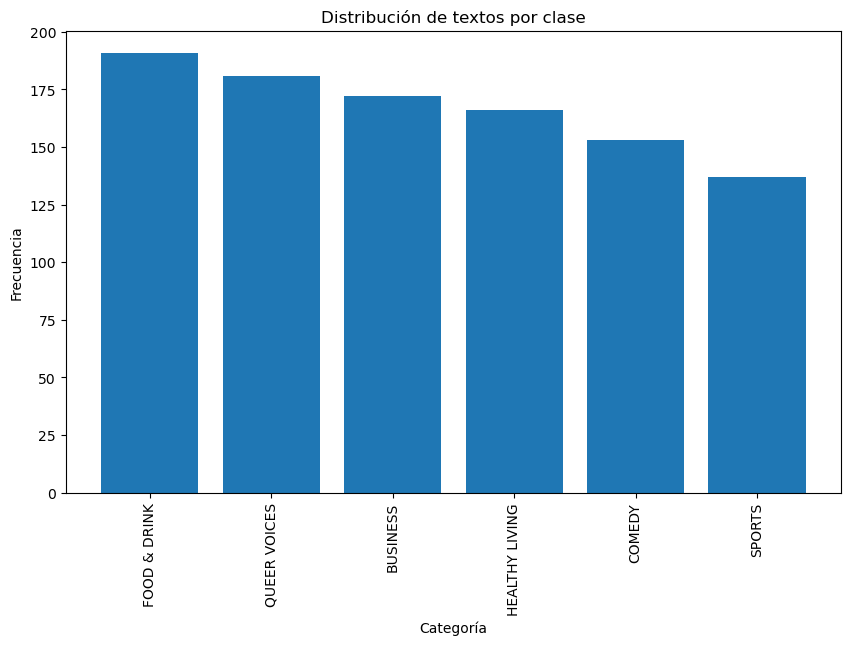

In [91]:
#############################################
# SOLUCIÓN                                #
#############################################
import matplotlib.pyplot as plt

class_counts = data_filtered['category'].value_counts()

# Crear un gráfico de barras para visualizar la distribución de textos por clase
plt.figure(figsize=(10, 6))
plt.bar(class_counts.index, class_counts.values)
plt.xlabel('Categoría')
plt.ylabel('Frecuencia')
plt.title('Distribución de textos por clase')
plt.xticks(rotation=90)
plt.show()


Preparad y preprocesad los datos para el entrenamiento. Utilizaremos one-hot encoding por las etiquetas.

In [ ]:
!pip install sklearn

In [92]:
#############################################
# SOLUCIÓN                                #
#############################################
import string

# Eliminar signos de puntuación
data_filtered['headline'] = [s.translate(str.maketrans('', '', string.punctuation)) for s in data_filtered['headline']]

# Convertir a minúsculas
data_filtered['headline'] = [s.lower() for s in data_filtered['headline']]

Realizamos one-hot encoding para las etiquetas usando la función **to_categorical** de la biblioteca **keras.utils** para convertir las etiquetas en formato one-hot. En este caso como ya están en formato categorico, se dejan igual.

En principio vamos a usar todas las clases pero sepodría elegir un máximo de clases

In [93]:
data_filtered.head()

,headline,category
14437,‘rupaul’s drag race all stars 3’ episode 3 rec...,QUEER VOICES
86664,how to live this year as if it were your last,HEALTHY LIVING
61086,jason collins says he came out to the clintons...,QUEER VOICES
65665,muhammad ali risked it all when he opposed the...,SPORTS
126208,imagine if you could time travel to interrupt ...,COMEDY


## 2.2 Preparar datos y embeddings para entrenar (1 punto)
La idea del modelo de clasificación que queremos implementar es más simple que la del encoder-decoder usado en el apartado 1.

El modelo debe consistir sólo en:

- una capa embedding con los pesos del modelo Glove preentrenado para el inglés disponible en el archivo 'glove.42B.300d.txt'
- una capa LSTM con un número de units a elegir (por ejemplo, 300)
- una capa Dense con una dimensión de salida que tiene el número de categorías con las que queremos clasificar (en este caso, 6).
- Además, como loss function `loss` utilizaremos 'categorical_crossentropy' y como `optimizer`, 'adam'.

Primeramente creamos un tokenizador para las frases del clasificador

In [95]:
#############################################
# SOLUCIÓN                               #
#############################################
#Tokenizar las frases en inglés
tokenizer = tokenization(data_filtered['headline'])

# Imprimimos algunos datos del vocabulario en holandes
print(list(tokenizer.word_index.items())[:10])

[('the', 1), ('to', 2), ('a', 3), ('of', 4), ('in', 5), ('and', 6), ('for', 7), ('is', 8), ('your', 9), ('you', 10)]



Cargamos el siguiente modelo GloVe para el inglés. Lo hemos utilizado en la parte 1.

In [29]:
#############################################
# SOLUCIÓN                                #
#############################################
import numpy as np

embeddings_index = {}

file_path = "/kaggle/input/data-glove/glove.42B.300d.txt"
f = open(file_path)
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print(len(embeddings_index))

1917494


In [31]:
# Usamos el english_tokenizer creado anteriormente
embedding_matrix = np.zeros((len(tokenizer.word_index) + 1, 300))
for word, i in tokenizer.word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector


Una vez cargado el modelo de GloVe definimos la capa de Embedding con todos sus pesos


In [33]:
#############################################
# SOLUCIÓN                                  #
#############################################
from keras.layers import Embedding

embedding_vec_length = 300
max_text_length = 12
embedding_layer = Embedding(len(tokenizer.word_index) + 1,
                            embedding_vec_length,
                            weights=[embedding_matrix],
                            input_length=max_text_length,
                            trainable=False,
                            mask_zero=True)

Preparamos el corpus de entrenamiento y test, usando el model_selection de sklearn, y el onehot_encoded para las clases. Usamos 80% para train. 

In [96]:
from sklearn.model_selection import train_test_split

# Generamos el conjunto de trairn y test 
X_train, X_test, y_train, y_test = train_test_split(data_filtered['headline'], data_filtered['category'], test_size=0.2, random_state=42, shuffle=True)

Codificar los vectores de entrada para el train y para el text

In [97]:
#############################################
# SOLUCIÓN                                  #
#############################################

# Codificamos el conjunto de train
max_length = 12
X_train = encode_sequences(tokenizer, max_length, X_train)
X_test = encode_sequences(tokenizer, max_length, X_test)

X_train[:5]

array([[   1,  240,  648,   10,  119,  185,  104,  101,  186,    0,    0,
           0],
       [2509,    6, 2510,   34,  144,  738,    0,    0,    0,    0,    0,
           0],
       [2877,  109,  222,  929,    0,    0,    0,    0,    0,    0,    0,
           0],
       [   1, 2558, 2559,    5, 2560, 2561,    6,   58,  544,   16,  288,
           0],
       [3229, 3230,  401, 3231,  266, 3232,   24, 3233,    2, 3234,    0,
           0]], dtype=int32)

In [98]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical

# Codificar las etiquetas con valores numéricos
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Aplicar one-hot encoding a las etiquetas codificadas
num_classes = 6
y_train_one_hot = to_categorical(y_train_encoded, num_classes)
y_test_one_hot = to_categorical(y_test_encoded, num_classes)

## 2.3 Definir el modelo y entrenar (1 punto).


El modelo debe consistir sólo en:

+ una capa embedding con los pesos del modelo GloVe preentrenado para el inglés disponible en el archivo 'glove.42B.300d.txt'
+ una capa LSTM con un número de units a elegir (por ejemplo, 300)
+ una capa Dense con una dimensión de salida que tiene el número de categorías con las que queremos clasificar (en este caso, 6).
    
Además, como loss function loss utilizaremos 'categorical_crossentropy' y como optimizer, 'adam'.

In [99]:
#############################################
# SOLUCIÓN                                  #
#############################################

from keras.models import Sequential
from keras.layers import Dense, LSTM, Embedding, RepeatVector

def define_model(embedding_layer,units, out_vocab_size):
    model = Sequential()
    # Embedding
    model.add(embedding_layer)
    
    # LSTM
    model.add(LSTM(units))
   
    # Output
    model.add(Dense(out_vocab_size, activation='softmax'))
    return model

units = 300
model = define_model(embedding_layer, units, num_classes)

Compilar el modelo

In [101]:
#############################################
# SOLUCIÓN                                  #
#############################################
from keras import optimizers

adam = optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=adam, loss='categorical_crossentropy')


Entrenar y guardar el modelo. En esta sección aunque sea recomendable usar GPU, con CPU también se puede obtener el resultado sin tener que esperar "mucho" tiempo

In [102]:
#############################################
# SOLUCIÓN                                  #
#############################################

from keras.callbacks import ModelCheckpoint

filename = 'model_final.h5'

#La función ModelCheckpoint() guarda el modelo con la pérdida de validación más baja.

checkpoint = ModelCheckpoint(filename, monitor='val_loss', verbose=1, save_best_only=True, mode='min')

#Entrenamiento del modelo. Se realiza con 30 epoch con un tamaño de batch de 512, con un reparto de validación del
#20%; esto es, 80% se destina al entrenamiento en sí, y el 20% restante a su validación.

model.fit(X_train, y_train_one_hot,
                    epochs=30, batch_size=512, validation_split = 0.2,callbacks=[checkpoint], 
                    verbose=1)

Epoch 1/30

1/2 [==============>...............] - ETA: 3s - loss: 1.8163

Epoch 1: val_loss improved from inf to 1.82161, saving model to model_final.h5

2/2 [==============================] - 5s 2s/step - loss: 1.8083 - val_loss: 1.8216

Epoch 2/30

1/2 [==============>...............] - ETA: 0s - loss: 1.7313

Epoch 2: val_loss improved from 1.82161 to 1.78411, saving model to model_final.h5

2/2 [==============================] - 0s 344ms/step - loss: 1.7518 - val_loss: 1.7841

Epoch 3/30

1/2 [==============>...............] - ETA: 0s - loss: 1.6804

Epoch 3: val_loss improved from 1.78411 to 1.73537, saving model to model_final.h5

2/2 [==============================] - 0s 331ms/step - loss: 1.6769 - val_loss: 1.7354

Epoch 4/30

1/2 [==============>...............] - ETA: 0s - loss: 1.6284

Epoch 4: val_loss improved from 1.73537 to 1.72087, saving model to model_final.h5

2/2 [==============================] - 0s 356ms/step - loss: 1.6201 - val_loss: 1.7209

Epoch 5/30

1/2 [==

## 2.4 Evaluar el modelo (1 punto)

Se evalua el modelo y se obtienen sus diferentes métricas. 

In [103]:
#############################################
# SOLUCIÓN                                  #
#############################################

predictions = model.predict(X_test)

7/7 [==============================] - 1s 3ms/step


In [104]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

y_true = np.argmax(y_test_one_hot, axis=1)
y_pred = np.argmax(predictions, axis=1)

# Calcular la exactitud (accuracy)
accuracy = accuracy_score(y_true, y_pred)
print("Accuracy del modelo:", accuracy)

# Calcular la precisión (precision)
precision = precision_score(y_true, y_pred, average='weighted')
print("Precision del modelo:", precision)

# Calcular la exhaustividad (recall)
recall = recall_score(y_true, y_pred, average='weighted')
print("Recall del modelo:", recall)

# Calcular la puntuación F1
f1 = f1_score(y_true, y_pred, average='weighted')
print("F1 del modelo:", f1)

# Generar el informe de clasificación
classification_report_res = classification_report(y_true, y_pred)

print(classification_report_res)

Accuracy del modelo: 0.335

Precision del modelo: 0.3255764095960964

Recall del modelo: 0.335

F1 del modelo: 0.3182224146455557

              precision    recall  f1-score   support



           0       0.24      0.14      0.17        37

           1       0.45      0.37      0.41        38

           2       0.49      0.52      0.50        33

           3       0.24      0.24      0.24        33

           4       0.32      0.61      0.42        33

           5       0.19      0.12      0.14        26



    accuracy                           0.34       200

   macro avg       0.32      0.33      0.31       200

weighted avg       0.33      0.34      0.32       200




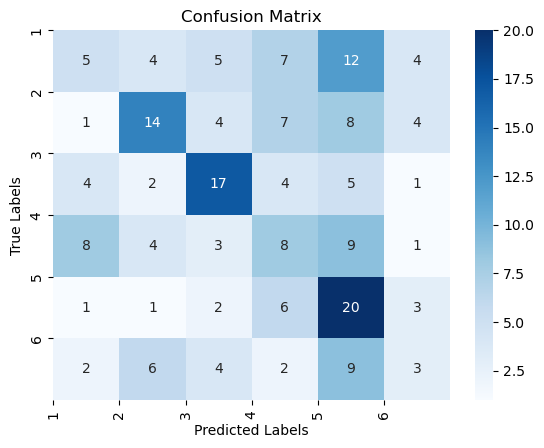

In [106]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Generar la matriz de confusión
confusion_matrix_res = confusion_matrix(y_true, y_pred)

# Graficar
sns.heatmap(confusion_matrix_res, annot=True, cmap='Blues', fmt='d')

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.xticks(ticks=np.arange(num_classes), labels=range(1,num_classes + 1), rotation=90)
plt.yticks(ticks=np.arange(num_classes), labels=range(1,num_classes + 1))

plt.show()

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;"> ¿Que pasaría si el modelo de clasificación lo entrenaramos con más datos? Estamos escogiendo solo los 1000 primeros, son muy pocos ejemplos y se entrena super rápido. Que pasaría con 5000? y 10000?
Y si no usaramos los embeddings de GloVe? Que nos aportan ambas cosas?
¿Si usamos más datos hacen falta usar los embeddings?

Expresar vuestra opinión con experimentación acorde para obtener las conclusiones.





## Comprobación

Para comprobar si lo resultados mejoran o no al aumentar el conjunto de datos,  vamos a seguir los mismos pasos que antes pero con el conjunto entero. Para ello usaremos el modelo definido anteriormente.

### Usando el conjunto entero

Usando los datos de longitud: 35850

[('the', 1), ('to', 2), ('a', 3), ('of', 4), ('in', 5), ('for', 6), ('and', 7), ('is', 8), ('on', 9), ('you', 10)]

Epoch 1/30

42/45 [===========================>..] - ETA: 0s - loss: 0.0010    

Epoch 1: val_loss improved from inf to 3.83433, saving model to model_final.h5

45/45 [==============================] - 1s 25ms/step - loss: 0.0010 - val_loss: 3.8343

Epoch 2/30

43/45 [===========================>..] - ETA: 0s - loss: 9.5860e-04

Epoch 2: val_loss did not improve from 3.83433

45/45 [==============================] - 1s 15ms/step - loss: 9.3729e-04 - val_loss: 3.8661

Epoch 3/30

44/45 [============================>.] - ETA: 0s - loss: 8.8478e-04

Epoch 3: val_loss did not improve from 3.83433

45/45 [==============================] - 1s 15ms/step - loss: 8.7832e-04 - val_loss: 3.8862

Epoch 4/30

41/45 [==========================>...] - ETA: 0s - loss: 8.4108e-04

Epoch 4: val_loss did not improve from 3.83433

45/45 [=================

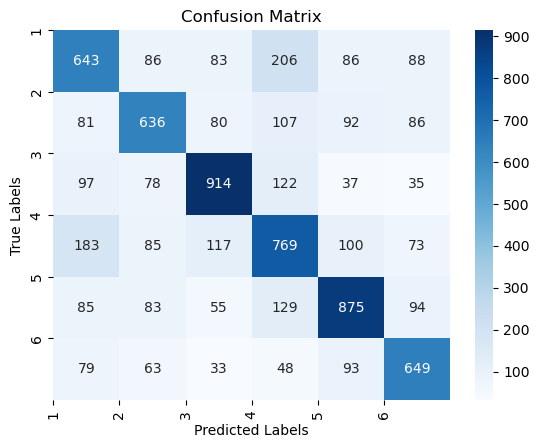

In [120]:
print("Usando los datos de longitud:", len(data))

import string

# Eliminar signos de puntuación
data['headline'] = [s.translate(str.maketrans('', '', string.punctuation)) for s in data['headline']]

# Convertir a minúsculas
data['headline'] = [s.lower() for s in data['headline']]

#Tokenizar las frases en inglés
tokenizer = tokenization(data['headline'])

# Imprimimos algunos datos del vocabulario en holandes
print(list(tokenizer.word_index.items())[:10])

from sklearn.model_selection import train_test_split

# Generamos el conjunto de trairn y test 
X_train, X_test, y_train, y_test = train_test_split(data['headline'], data['category'], test_size=0.2, random_state=42, shuffle=True)

# Codificamos el conjunto de train
max_length = 12
X_train = encode_sequences(tokenizer, max_length, X_train)
X_test = encode_sequences(tokenizer, max_length, X_test)


# Codificar las etiquetas con valores numéricos
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Aplicar one-hot encoding a las etiquetas codificadas
num_classes = 6
y_train_one_hot = to_categorical(y_train_encoded, num_classes)
y_test_one_hot = to_categorical(y_test_encoded, num_classes)

# Entrenar el modelo
filename = 'model_final.h5'
checkpoint = ModelCheckpoint(filename, monitor='val_loss', verbose=1, save_best_only=True, mode='min')

model.fit(X_train, y_train_one_hot,
                    epochs=30, batch_size=512, validation_split = 0.2,callbacks=[checkpoint], 
                    verbose=1)

# Evaluar el modelo
predictions = model.predict(X_test)

# Generar métricas
y_true = np.argmax(y_test_one_hot, axis=1)
y_pred = np.argmax(predictions, axis=1)

# Calcular la exactitud (accuracy)
accuracy = accuracy_score(y_true, y_pred)
print("Accuracy del modelo:", accuracy)

# Calcular la precisión (precision)
precision = precision_score(y_true, y_pred, average='weighted')
print("Precision del modelo:", precision)

# Calcular la exhaustividad (recall)
recall = recall_score(y_true, y_pred, average='weighted')
print("Recall del modelo:", recall)

# Calcular la puntuación F1
f1 = f1_score(y_true, y_pred, average='weighted')
print("F1 del modelo:", f1)

# Generar el informe de clasificación
classification_report_res = classification_report(y_true, y_pred)

print(classification_report_res)

# Generar la matriz de confusión
confusion_matrix_res = confusion_matrix(y_true, y_pred)

# Graficar
sns.heatmap(confusion_matrix_res, annot=True, cmap='Blues', fmt='d')

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.xticks(ticks=np.arange(num_classes), labels=range(1,num_classes + 1), rotation=90)
plt.yticks(ticks=np.arange(num_classes), labels=range(1,num_classes + 1))

plt.show()

Como vemos, los resultados son muy buenos, comparado con el modelo anterior.

Ahora probamos generando un modelo sin el embedding de GloVe y usaremos un Embeeding simple, como el usado al principio de esta actividad.

### Usando GloVe

Usando los datos de longitud: 1000

[('the', 1), ('to', 2), ('a', 3), ('of', 4), ('in', 5), ('and', 6), ('for', 7), ('is', 8), ('your', 9), ('on', 10)]

Epoch 1/30

1/2 [==============>...............] - ETA: 3s - loss: 1.7913

Epoch 1: val_loss improved from inf to 1.78736, saving model to model_final_new.h5

2/2 [==============================] - 5s 1s/step - loss: 1.7909 - val_loss: 1.7874

Epoch 2/30

1/2 [==============>...............] - ETA: 0s - loss: 1.7746

Epoch 2: val_loss improved from 1.78736 to 1.78166, saving model to model_final_new.h5

2/2 [==============================] - 0s 122ms/step - loss: 1.7731 - val_loss: 1.7817

Epoch 3/30

1/2 [==============>...............] - ETA: 0s - loss: 1.7541

Epoch 3: val_loss improved from 1.78166 to 1.77434, saving model to model_final_new.h5

2/2 [==============================] - 0s 97ms/step - loss: 1.7521 - val_loss: 1.7743

Epoch 4/30

1/2 [==============>...............] - ETA: 0s - loss: 1.7254

Epoch 4: val_loss improved 

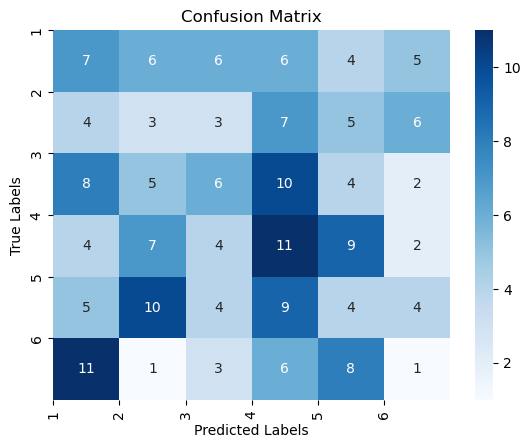

In [122]:
data = data.sample(n=1000, random_state=42)
print("Usando los datos de longitud:", len(data))

import string

# Eliminar signos de puntuación
data['headline'] = [s.translate(str.maketrans('', '', string.punctuation)) for s in data['headline']]

# Convertir a minúsculas
data['headline'] = [s.lower() for s in data['headline']]

#Tokenizar las frases en inglés
tokenizer = tokenization(data['headline'])

# Imprimimos algunos datos del vocabulario en holandes
print(list(tokenizer.word_index.items())[:10])

from sklearn.model_selection import train_test_split

# Generamos el conjunto de trairn y test 
X_train, X_test, y_train, y_test = train_test_split(data['headline'], data['category'], test_size=0.2, random_state=42, shuffle=True)

# Codificamos el conjunto de train
max_length = 12
X_train = encode_sequences(tokenizer, max_length, X_train)
X_test = encode_sequences(tokenizer, max_length, X_test)


# Codificar las etiquetas con valores numéricos
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Aplicar one-hot encoding a las etiquetas codificadas
num_classes = 6
y_train_one_hot = to_categorical(y_train_encoded, num_classes)
y_test_one_hot = to_categorical(y_test_encoded, num_classes)
simple_embedding = Embedding(len(tokenizer.word_index) + 1, embedding_vec_length, input_length = max_text_length, mask_zero=True)

# Definir modelo
units = 300
new_model = define_model(simple_embedding, units, num_classes)

# Compilar modelo
adam = optimizers.Adam(learning_rate=0.001)
new_model.compile(optimizer=adam, loss='categorical_crossentropy')

# Entrenar modelo

filename = 'model_final_new.h5'
checkpoint = ModelCheckpoint(filename, monitor='val_loss', verbose=1, save_best_only=True, mode='min')

new_model.fit(X_train, y_train_one_hot,
                    epochs=30, batch_size=512, validation_split = 0.2,callbacks=[checkpoint], 
                    verbose=1)

# Evaluar el modelo
predictions = model.predict(X_test)

# Generar métricas
y_true = np.argmax(y_test_one_hot, axis=1)
y_pred = np.argmax(predictions, axis=1)

# Calcular la exactitud (accuracy)
accuracy = accuracy_score(y_true, y_pred)
print("Accuracy del modelo:", accuracy)

# Calcular la precisión (precision)
precision = precision_score(y_true, y_pred, average='weighted')
print("Precision del modelo:", precision)

# Calcular la exhaustividad (recall)
recall = recall_score(y_true, y_pred, average='weighted')
print("Recall del modelo:", recall)

# Calcular la puntuación F1
f1 = f1_score(y_true, y_pred, average='weighted')
print("F1 del modelo:", f1)

# Generar el informe de clasificación
classification_report_res = classification_report(y_true, y_pred)

print(classification_report_res)

# Generar la matriz de confusión
confusion_matrix_res = confusion_matrix(y_true, y_pred)

# Graficar
sns.heatmap(confusion_matrix_res, annot=True, cmap='Blues', fmt='d')

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.xticks(ticks=np.arange(num_classes), labels=range(1,num_classes + 1), rotation=90)
plt.yticks(ticks=np.arange(num_classes), labels=range(1,num_classes + 1))

plt.show()

Vemos que a pesar de usar un modelo preentrenado, el resultado es malo pues la capacidad predictiva del modelo se ve muy afectada por la falta de datos.

Viendo los resultados anteriores podemos cocluir que si tenemos un conjunto de datos lo suficientemente grande puede ser que no sea necesario usar un embedding preentrenado como GloVe, pues estos son modelos útiles cuando contamos con un conjunto limitado de datos.

# PARTE 3



# 3. Detección de NER and NEL (2 puntos)

En esta parte detectarermos entidades numeradas utilizando tanto SpaCy con transformers como transformers simplemente. En el segundo caso usando una librería llamada simple transformers.

Por otro lado, también haremos Named Entity Linking (NEL) donde buscaremos entidades linkadas a una base de conocimiento (KB), en este caso DBpedia. Encontraremos los enlaces a Wikpedia de ciertas entidades del texto, utilizando DBPedia Spotlight.

## 3.1 Detección de NER en Spacy (1 punto)

Detección de entidades nombradas (NER) usando spaCy. En esta sección usaremos spaCy para detectar NER. A partir de un corpus de CONLL 2003, lo reeentrenaremos y de esta manera afinaremos su cobertura para estas clases. 

Instalamos spacy y mos modelos de lenguaje que necesitemos. 

In [1]:
%%capture
!pip install spacy==3.2.0

!python -m spacy download en_core_web_sm-3.2.0 --direct

Definimos un par de funciones que nos va a permitir imprimir los resultados de la detección de NER de forma muy interpretable

In [6]:
def get_tokens_to_print(model, text):
        """Print tokens of the text and its relevant attributes.

            Parameters:
              model (spaCy model): spaCy model used for tokenization
              text (str):  text to transform in a spaCy doc class.

            Returns: ---
        """
        doc = model(text)
        print (f"The text:\n\n{get_text_to_print(text)}\n\nwas converted in a spaCy object: {type(doc)}\n")
        print (f"Token-based analysis. Each token is a spaCy object: {type(doc[0])}\n")

        # We obtain rows to print: headers and content
        rows  = []
        # head_align: List of tuples. Each tuple: heather and its alignment when printing
        head_align  = [('Token', '<'), ('Lemma', '<'), ('Syntactic parent', '<'), ('#Tok', '>'), ('Chr_Start', '>'), ('Chr_End', '>'), ('POS', '<'), 
                     ('TAG', '<'), ('TAG meaning:', '<'), ('ENT', '<'), ('DEP', '<'), ('DEP meaning:', '<')]   
        head, align = list(zip(*head_align))  
        rows.append(head)                           # Header
        rows.append(['='*len(i) for i in head])     # Underline headers
        for tok in doc:
            rows.append([tok.text, tok.lemma_, tok.head.text, str(tok.i), str(tok.idx), str(tok.idx+len(tok)-1), tok.pos_, 
                     tok.tag_, str(spacy.explain(tok.tag_))[:20], tok.ent_type_, tok.dep_, str(spacy.explain(tok.dep_))[:20]])

        # Width of each column: the witdh of the longest element
        columns = zip(*rows)     
        column_widths = [max(len(i) for i in col) for col in columns]

        # Print the files with alignment
        for row in rows:
            print(*[f"{row[i]:{align[i]}{column_widths[i]}}  " for i in range(0, len(row))])

In [7]:
def get_text_to_print(text):
    """Format given text.

        Parameters:
          text (str): text to print

        Returns:
          str: text formatted in 100 character lines with an initial line numbering the characters
    """
    line_length = 100
    line_poss   = "     1-------10--------20--------30--------40--------50--------60--------70--------80--------90-------100"
    text        = text.replace("\n", " ")     # In order to avoid that the \n character produces a line change.
    text        = text.replace("\r", " ")     # In wikipedia texts we have detected the character '\r' that, if interpreted, may induce some printing problems.
    text_format = "\n".join([ f"{i//line_length:<5}{text[i:i+line_length]}"  for i in range(0, len(text), line_length) ])
    return line_poss + "\n" + text_format + "\n" + line_poss

Cargamos el modelo "en_core_web_sm"

In [3]:
# 
##################
## SOLUCION ####
##################
import spacy

en_core_web_sm_model = spacy.load('en_core_web_sm')

Convertimos un texto en objecto 'Doc' de spaCy y visualizamos los resultados de analizar este texto a nivel de POS, NER, ENT, DEP... 

In [40]:
##################
## SOLUCION ####
##################

# Procesamiento de un texto de ejemplo
text = "The curious cat danced beneath the moonlit sky while juggling twinkling stars las week."

doc = en_core_web_sm_model(text)

# Acceder a las palabras y etiquetas POS
for token in doc:
    print(token.text, token.pos_)

    
# Usingd get_tokens_to_print
get_tokens_to_print(en_core_web_sm_model, text) 

The DET

curious ADJ

cat NOUN

danced VERB

beneath ADP

the DET

moonlit ADJ

sky NOUN

while SCONJ

juggling VERB

twinkling VERB

stars NOUN

las PROPN

week NOUN

. PUNCT

The text:



     1-------10--------20--------30--------40--------50--------60--------70--------80--------90-------100

0    The curious cat danced beneath the moonlit sky while juggling twinkling stars las week.

     1-------10--------20--------30--------40--------50--------60--------70--------80--------90-------100



was converted in a spaCy object: <class 'spacy.tokens.doc.Doc'>



Token-based analysis. Each token is a spaCy object: <class 'spacy.tokens.token.Token'>



Token       Lemma     Syntactic parent   #Tok   Chr_Start   Chr_End   POS     TAG   TAG meaning:           ENT    DEP        DEP meaning:          

=====       =====     ================   ====   =========   =======   ===     ===   ============           ===    ===        ============          

The         the       cat                   0

In [41]:
colors  = {"ORG": "yellow", "PER": "orange", "LOC": "springgreen", "MISC": "lightgray"}
options = {"colors": colors}
print ("\n")
displacy.render(doc, jupyter=True, style="ent", options = options)
print ("\n")

Entrenar un nuevo modelo de NER con los datos de CONLL2003

Convertimos los ficheros conll03 (train y valid) a formato spaCy. 
El corpus lo hemos obtenido de aquí:
https://github.com/Hironsan/anago

Tip: spacy contiene funciones que permiten convertir de formato conll al formato compilado que necesitan el módulo de train de spaCy. 


In [150]:
#####################
### SOLUCION ###
##################
import spacy
from spacy.training import Example

def create_spacy_data(file_path):
    sentences = []
    with open(file_path, 'r', encoding='utf-8') as file:
        lines = file.read().strip().split('\n\n')
        for line in lines:
            words = []
            tags = []
            for token in line.split('\n'):
                token_parts = token.split('\t')
                words.append(token_parts[0])
                tags.append(token_parts[1])
            sentences.append((words, tags))
    print(sentences[1])
    nlp = spacy.blank('en')  # Crea un objeto de modelo en blanco
    data = []

    for words, tags in sentences:
        doc = nlp.make_doc(" ".join(words))
        print(tags)
        entities = []
        for start, end, label in spacy.training.iob_to_biluo(tags):
            entities.append((start, end, label))
        example = Example.from_dict(doc, {"entities": entities})
        data.append(example)
        
    return data


In [ ]:
import spacy
from spacy.gold import conll2json

# Ruta de los archivos CoNLL03 (train y valid)
train_file = "ruta/al/archivo/train.txt"
valid_file = "ruta/al/archivo/valid.txt"

# Ruta de salida para los archivos en formato compilado
output_train_file = "ruta/de/salida/train.spacy"
output_valid_file = "ruta/de/salida/valid.spacy"

# Cargar el modelo de idioma en spaCy
nlp = spacy.blank("en")

# Convertir el archivo CoNLL03 de entrenamiento al formato compilado de spaCy
with open(train_file, "r") as file:
    train_data = file.read()
train_docs = conll2json(nlp, train_data)
with open(output_train_file, "w") as file:
    file.write(train_docs)

# Convertir el archivo CoNLL03 de validación al formato compilado de spaCy
with open(valid_file, "r") as file:
    valid_data = file.read()
valid_docs = conll2json(nlp, valid_data)
with open(output_valid_file, "w") as file:
    file.write(valid_docs)

In [31]:
import spacy
from spacy.tokens import DocBin

train_file_path = 'data/ner/conll03/train.txt'
test_file_path = 'data/ner/conll03/test.txt'
valid_file_path = 'data/ner/conll03/valid.txt'

train_file_out_path = 'data/ner/conll03/train.spacy'
test_file_out_path = 'data/ner/conll03/test.spacy'
valid_file_out_path = 'data/ner/conll03/valid.spacy'

# Cargar el modelo de idioma en spaCy
nlp = spacy.blank("en")

# Función para convertir los datos CoNLL03 al formato compilado de spaCy
def convert_conll_to_spacy(input_file, output_file):
    docs = []
    with open(input_file, "r") as file:
        lines = file.readlines()
        current_tokens = []
        for line in lines:
            if line.startswith("-DOCSTART-") or line == "\n":
                if current_tokens:
                    doc = spacy.tokens.Doc(nlp.vocab, words=current_tokens)
                    docs.append(doc)
                    current_tokens = []
            else:
                columns = line.split()
                current_tokens.append(columns[0])
    
    return docs

# Convertir el archivo CoNLL03 de entrenamiento al formato compilado de spaCy
tarin_doc = convert_conll_to_spacy(train_file_path, train_file_out_path)
valid_doc = convert_conll_to_spacy(valid_file_path, valid_file_out_path)
test_doc = convert_conll_to_spacy(test_file_path, test_file_out_path)


In [37]:
import spacy
from spacy.tokens import DocBin

train_file_path = 'data/ner/conll03/train.txt'
test_file_path = 'data/ner/conll03/test.txt'
valid_file_path = 'data/ner/conll03/valid.txt'

train_file_out_path = 'data/ner/conll03/train.spacy'
test_file_out_path = 'data/ner/conll03/test.spacy'
valid_file_out_path = 'data/ner/conll03/valid.spacy'

# Cargar el modelo de idioma en spaCy
nlp = spacy.blank("en")

# Function to convert CoNLL03 data to compiled format
def convert_conll_to_spacy(input_file, output_file):
    doc_bin = DocBin()
    with open(input_file, "r") as file:
        lines = file.readlines()
        current_tokens = []
        for line in lines:
            if line.startswith("-DOCSTART-") or line == "\n":
                if current_tokens:
                    doc = spacy.tokens.Doc(nlp.vocab, words=current_tokens)
                    doc_bin.add(doc)
                    current_tokens = []
            else:
                columns = line.split()
                current_tokens.append(columns[0])
    
    # Save the documents in compiled format
    doc_bin.to_disk(output_file)

tarin_doc = convert_conll_to_spacy(train_file_path, train_file_out_path)
valid_doc = convert_conll_to_spacy(valid_file_path, valid_file_out_path)
test_doc = convert_conll_to_spacy(test_file_path, test_file_out_path)

In [34]:
import random

for i, doc in enumerate(random.sample(tarin_doc,5)):
    print(f"\n## Sentence {i+1}:")
    spacy.displacy.render(doc, style="ent", jupyter=True) 



## Sentence 1:




## Sentence 2:




## Sentence 3:




## Sentence 4:




## Sentence 5:


Descargar el modelo 'en_core_web_trf'

In [22]:
%%capture

!python -m spacy download en_core_web_trf

In [5]:
!python -m spacy validate



| Loading compatibility table...

/ Loading compatibility table...

[+] Loaded compatibility table



================= Installed pipeline packages (spaCy v3.2.0) =================

[i] spaCy installation:

C:\Users\FPA\Downloads\uoc\text_mining\PLA1-ANALISIS\notebook-es\lib\site-packages\spacy



NAME              SPACY            VERSION      

en_core_web_sm    >=3.2.0,<3.3.0   3.2.0     [+]

en_core_web_trf   >=3.2.0,<3.3.0   3.2.0     [+]




In [6]:
import spacy
print (f"Spacy version installed: {spacy.__version__}")

Spacy version installed: 3.2.0


Entrenar usando la función train de spaCy a partir del modelo 'en_core_web_trf'. 
Usar el fichero de configuración adjunto y modificar las cosas que consideréis oportunas. La versión entregada ya funciona pero se puede customizar si hay interés. 

In [7]:
##################
### SOLUCION ###
################
model = spacy.load('en_core_web_trf')


c:\users\fpa\downloads\uoc\text_mining\pla1-analisis\notebook-es\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html

  from .autonotebook import tqdm as notebook_tqdm


In [3]:
!python -m spacy train ./data/ner/conll03/config.cfg --output ./tmp/output --paths.train ./data/ner/conll03/train.spacy --paths.dev ./data/ner/conll03/valid.spacy

Predecir una frase de ejemplo con el nuevo modelo y visualizar los resultados. 
Ojo que colab, no le gusta cargar modelos desde paths, solo si estan en local, con lo que recomendamos, generar el modelo en drive, guardarlo y luego subir la mejor versión para cargarlo desde de aquí. 


In [9]:

##################
### SOLUCION ###
################
# Procesamiento de un texto de ejemplo
text = "I was feeling really tired the last week."
doc = model(text)

# Acceder a las palabras y etiquetas POS
for token in doc:
    print(token.text, token.pos_)

from spacy import displacy
displacy.render(model(text), style='ent', jupyter=True)

I PRON

was AUX

feeling VERB

really ADV

tired ADJ

the DET

last ADJ

week NOUN

. PUNCT


Evaluar los resultados obtenidos y calcular las métricas

In [ ]:
############ 
###SOLUCION##
##############


## 3.3 NEL (1 punto)

En esta sección, la idea es obtener los enlaces en la DBpedia spotlight relacionados con las entidades que se han obtenido de NER usando spaCy. 



Desarrolla una función que dado un texto, obtenga automáticamente las entidades relacionadas en el DBpedia Spotlight.
URL de acceso a la API, DBPedia inglés: https://www.dbpedia-spotlight.org/api o https://www.dbpedia-spotlight.org/api/en

In [2]:
##############################
# SOLUCIO #
########################
import requests
import json

def get_dbpedia_entities(text):
    base_url = "https://api.dbpedia-spotlight.org/en/annotate"
    params = {
        "text": text,
        "confidence": "0.5",
        "support": "20"
    }
    headers = {
        "Accept": "application/json"
    }

    response = requests.get(base_url, params=params, headers=headers)
    if response.status_code == 200:
        data = json.loads(response.text)
        resources = data["Resources"]
        related_entities = []
        for resource in resources:
            related_entities.append(resource["@URI"])
        return related_entities
    else:
        print("Error: ", response.status_code)
        return []

# Ejemplo de uso
input_text = "Barack Obama was born in Honolulu."
entities = get_dbpedia_entities(input_text)
print(entities)

Error:  502
[]
